<a href="https://colab.research.google.com/github/Arbind96/Nlp/blob/main/Pima_Indians_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from google.colab import drive
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
drive.mount('/content/gdrive')
data_path="/content/gdrive/MyDrive/DeepLearning/Assignment/pima-indians-diabetes.csv"


Mounted at /content/gdrive


In [4]:
data = pd.read_csv(data_path)
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
train1 = data.drop(['Outcome'],axis=1)
labels = data['Outcome']
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.20,random_state =2)
x_train.shape

(614, 8)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

#Create model
#Accuracy 73%
# model = Sequential()
# model.add(Dense(64, input_dim=8, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

#71%
# model = Sequential()
# model.add(Dense(64, input_dim=8, activation='relu', kernel_regularizer='l2'))
# model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
# model.add(Dense(16, activation='relu', kernel_regularizer='l2'))
# model.add(Dense(8, activation='relu', kernel_regularizer='l2'))
# model.add(Dense(1, activation='sigmoid'))

#0.75
model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu', kernel_regularizer='l2'))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dense(16, activation='relu', kernel_regularizer='l2'))
model.add(Dense(8, activation='relu', kernel_regularizer='l2'))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

with tf.device('/gpu:0'):
  history=model.fit(x=x_train,y=y_train.values,
            validation_data=(x_test,y_test.values),
            batch_size=128,epochs=1000)

Epoch 1/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.5827 - accuracy: 0.7948 - val_loss: 0.6312 - val_accuracy: 0.8052
Epoch 2/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.5826 - accuracy: 0.7818 - val_loss: 0.6440 - val_accuracy: 0.7922
Epoch 3/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.5772 - accuracy: 0.8013 - val_loss: 0.6277 - val_accuracy: 0.7792
Epoch 4/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.5844 - accuracy: 0.7801 - val_loss: 0.6648 - val_accuracy: 0.7597
Epoch 5/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.5822 - accuracy: 0.7834 - val_loss: 0.6318 - val_accuracy: 0.7857
Epoch 6/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.5788 - accuracy: 0.7997 - val_loss: 0.6312 - val_accuracy: 0.7922
Epoch 7/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.5734 - accuracy: 0.7932 - val_loss: 0.6306 - val_accuracy: 0.7662
Epoch 8/1000
5/5 [=

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
predictions = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,predictions)))


0.406908313648732


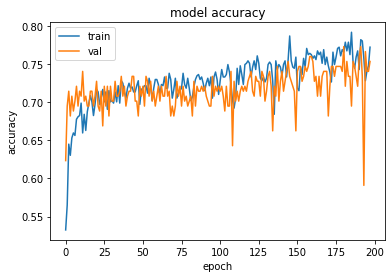

In [10]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
results = model.evaluate(x_test, y_test, batch_size=128)

2/2 [==============================] - 0s 8ms/step - loss: 0.7078 - accuracy: 0.7532
